In [ ]:
__nbid__ = '0023'
__author__ = 'Felix Pat <felixpat10@email.arizona.edu>, Stephanie Juneau <stephanie.juneau@noirlab.edu>, Alice Jacques <alice.jacques@noirlab.edu>, David Herrera <david.herrera@noirlab.edu>'
__version__ = '20251205' # yyyymmdd
__datasets__ = ['gogreen_dr2']
__keywords__ = ['gemini llp', 'tap', 'cluster', 'photometry', 'redshift', 'file service', 'spectra', 'catalogues']

# Introducción a la espectroscopía del conjunto de datos Gogreen DR2
*Autores: Felix Pat (Univ. De Arizona), Stéphanie Juneau (Noirlab Astro Data Lab), Alice Jacques (Noirlab Astro Data Lab) y el equipo de Astro Data Lab*

#### (_Traducción de [4_GOGREENDr2Spec1DRedshift.ipynb](https://github.com/astro-datalab/notebooks-latest/blob/master/03_ScienceExamples/GOGREEN_GalaxiesInRichEnvironments/4_GOGREENDr2Spec1DRedshift.ipynb)_)

**Nota:** Astro Data Lab también aloja a Gogreen DR1. Sin embargo, Gogreen DR2 reemplaza a la versión DR1 y debe usarse para todos y cada uno de los casos científicos.

### Tabla de contenido
* [Objetivo](#Specgoal)
* [Resumen](#Specsummary)
* [Avisos Legales y atribuciones](#Specdisclaimer)
* [Importaciones y configuración](#SpecImport)
* [Autenticación](#auth)
* [Defina las funciones utilizadas en el tutorial](#spec0)
* [Lectura en catálogos de la base de datos del DataLab](#spec1)
* [Haga variables para vías de uso común](#Spec2)
* [Vía de impresión de cúmulos con 2D Galaxy Spectra disponible](#Spec3)
* [Haga variables para el nombre de galaxia preseleccionado y SPECID](#spec4)
* [Imprima la URL disponible del cúmulo seleccionado y la imagen Galaxy de visualización](#Spec5)
* [Muestra 1D y 2D Spectrum of Galaxy](#Spec6)
* [Encuentra el espectro restante continuo y el ajuste gaussiano de la región de interés](#spec7)
* [Compare los valores calculados de desplazamiento al rojo y de ancho equivalente con Gogreen](#Spec8)
* [Referencias](#Spec9)

<a class = "Anchor" id = "Specgoal"> </a>
# Objectivo
Este notebook tiene como objetivo ilustrar las características de la línea de emisión del espectro 1D y 2D y cómo derivar el desplazamiento al rojo y el ancho equivalente del doblete \[O II] 3727 de un ajuste gaussiano.

<A class = "Anchor" id = "Specsummary"> </a>
# Resumen
Este notebook enseña cómo desplegar una imagen de galaxia, graficar su espectro 1D y 2D y ajustar la línea de emisión para calcular el desplazamiento al rojo y el ancho equivalente para comparar los valores de la base de datos de Gogreen.

<a class="anchor" id="attribution"></a>
# Avisos Legales y atribuciones

Avisos Legales
-----------
Tome en cuenta que usar el Astro Data Lab constituye un acuerdo con nuestros [Avisos Legales](https://datalab.noirlab.edu/disclaimers.php) mínimos.

Reconocimientos
---------------
Si ud. usa el **Astro Data Lab** en sus publicaciones de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios de datos proveeidos por el Astro Data Lab, el cual es parte del Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) del NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc."(Asociación de Universidaddes para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

Si utiliza **SPARCL junto con la plataforma de Astro Data Lab** (por medio de JupyterLab, línea de comando o interfaz de la web) en su publicación de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios o datos proporcionados por el "SPectra Analysis and Retrievable Catalog Lab" (SPARCL) (Laboratorio de Análisis y Catálogo Recuperable de Espectros) y el Astro Data Lab, ambos pertenecientes al Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) de NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc." (Asociación de Universidades para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

En cualquiera de los casos, **por favor cite las siguientes publicaciones**:

* Publicación del concepto de Data Lab: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Descripción general del Astro Data Lab: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411.

Si hace referencia al Jupyterlab / Jupyter notebooks de Data Lab, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097.

Si publica en una revista de la AAS, agregue también la palabra clave `\facility{Astro Data Lab}`

Y si está usando SPARCL, por vor agregue también `\software{SPARCL}` y cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576.

La biblioteca de NOIRLab mantiene [listas de reconocimientos apropiados](https://noirlab.edu/science/about/scientific-acknowledgments) para usar cuando se hacen publicaciones utilizando los recursos, servicios o datos del Laboratorio.

---- **Versión en Inglés** ----


# Disclaimer & attribution

Disclaimers
-----------
Note that using the Astro Data Lab constitutes your agreement with our minimal [Disclaimers](https://datalab.noirlab.edu/disclaimers.php).

Acknowledgments
---------------
If you use **Astro Data Lab** in your published research, please include the text in your paper's Acknowledgments section:

_This research uses services or data provided by the Astro Data Lab, which is part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

If you use **SPARCL jointly with the Astro Data Lab platform** (via JupyterLab, command-line, or web interface) in your published research, please include this text below in your paper's Acknowledgments section:

_This research uses services or data provided by the SPectra Analysis and Retrievable Catalog Lab (SPARCL) and the Astro Data Lab, which are both part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

In either case **please cite the following papers**:

* Data Lab concept paper: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Astro Data Lab overview: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411

If you are referring to the Data Lab JupyterLab / Jupyter Notebooks, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097

If publishing in a AAS journal, also add the keyword: `\facility{Astro Data Lab}`

And if you are using SPARCL, please also add `\software{SPARCL}` and cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576

The NOIRLab Library maintains [lists of proper acknowledgments](https://noirlab.edu/science/about/scientific-acknowledgments) to use when publishing papers using the Lab's facilities, data, or services.


<a class = "Anchor" id = "Specimport"> </a>
# Importaciones y configuración

In [1]:
# Librerías estándar
from io import BytesIO
import gzip
import re

# De Terceros
import numpy as np
np.seterr(divide='ignore')
import math
import pandas as pd
pd.set_option('display.max_columns', 500) # evitar el desbordamiento de las columnas
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14 # Aumentar el tamaño de los textos de la gráfica
from pyvo.dal import sia
from IPython.display import display_html

from astropy.modeling import models
from astropy.utils.data import download_file
from astropy.wcs import WCS
from astropy.io import fits, ascii
from astropy import units as u
from astropy.cosmology import FlatLambdaCDM

from specutils import Spectrum1D
from specutils.fitting import fit_lines
from specutils import SpectralRegion
from specutils.manipulation import extract_region

from scipy import integrate
# De DataLab
from dl import queryClient as qc, storeClient as sc

<a class="anchor" id="auth"></a>
# Autenticación
Se puede acceder a gran parte de la funcionalidad de Data Lab sin iniciar sesión explícitamente (el servicio utiliza un inicio de sesión anónimo). Sin embargo, algunas funciones, como guardar los resultados de las consultas en el espacio de almacenamiento virtual, requieren iniciar sesión (es decir, necesitará una cuenta de usuario registrada).

Si necesita iniciar sesión en Data Lab, descomente la celda a continuación y ejecútela:

In [ ]:
#from getpass import getpass
#token = ac.login(input("Ingrese su nombre de usuario: (+ENTER) "),getpass("Ingrese su contraseña:: (+ENTER) "))
#ac.whoAmI()

In [2]:
# Definir cosmología
cosmo = FlatLambdaCDM(H0=70, Om0=0.3) 
# Esta URL le dice al servicio SIA dónde encontrar imágenes y metadatos de imágenes
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/gogreen_dr2"
svc = sia.SIAService(DEF_ACCESS_URL)

<A class = "Anchor" id = "Spec1"> </a>
# Leyendo las tablas principales
El conjunto de datos Gogreen completo se puede encontrar [aquí](https://datalab.noirlab.edu/data/gemini-llps/gogreen-and-gclass). La primera parte de este notebook dependerá de la información disponible para todos los cúmulos de 'clusters_Table' e información para las galaxias de 'redshift_table'. Dado que no necesitamos usar toda la fotometría/imágenes, solo las recuperaremos según sea necesario más tarde en el notebook. 

Podemos usar la función globals() para crear dinámicamente variables. [Globals ()](https://docs.python.org/3/library/functions.html#globals) Devuelve el diccionario que implementa el espacio de nombres del módulo actual. Para el código dentro de las funciones, esto se establece cuando la función se define y sigue siendo la misma independientemente de dónde se llame la función.

In [3]:
dataset = 'gogreen_dr2'
tables = ['clusters', 'redshift']

for table in tables:
    globals()['%s_table'%table] = qc.query('select * from %s.%s' % (dataset, table), fmt = 'pandas')
    print('%s'%table)
    display_html(globals()[('%s_table'%table)].head(5))

clusters


,pa_deg,redshift,elat,elon,glat,glon,cluster_id,htm9,nest4096,ring256,dec_best,ra_best,ra_gmos,dec_gmos,random_id,vdisp,vdisp_err,cluster,fullname,gclass_m1,gclass_m2,gclass_m3,gclass_m4,gclass_m5,gogreen_m1,gogreen_m2,gogreen_m3,gogreen_m4,gogreen_m5,gogreen_m6,image_b,image_g,image_i,image_irac1,image_j,image_j1,image_k,image_r,image_u,image_v,image_y,image_z,kphot_cat,photoz_cat,preimage,stelmass_cat
0,0.0,1.156,73.719807,209.004945,43.629341,85.567791,10,3515738,41608482,67843,55.75340,244.17220,244.17180,55.757137,51.660860,782.0,39,SpARCS1616,SpARCS J1616+5545,GN2009AQ001-01,GN2009AQ001-02,GN2009AQ001-03,GN2010AQ00-06,GN2010AQ001-07,GN2016ALP004-06,GN2016ALP004-07,GN2017ALP004-09,GN2018ALP004-08,NaN,NaN,NaN,mos_Suprimeg_3,mos_Suprimei_3,mos_IRAC1_3,mos_WIRCamJ_3,NaN,mos_WIRCamK_3,mos_Suprimer_3,mos_MegaCamu_3,NaN,mos_HSCy_3,mos_HSCz_3,SpARCS-1616_totalall_WIRCamK.cat,SpARCS-1616_totalall_Ks.zout,mfrgN20150514S0083_add,SpARCS-1616_totalall_Ks.fout
1,NaN,0.871,74.240027,205.192905,43.768608,87.179267,19,3517590,47205462,64207,56.82500,243.31100,NaN,NaN,88.079790,1350.0,100,SpARCS1613,SpARCS J1613+5649,GN2010AQ001-04,GN2010AQ001-05,GN2009AQ001-08,GN2009AQ001-09,GN2009AQ001-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mos_g,mos_i,mos_IRAC1,mos_J,NaN,mos_K,mos_r,mos_u,NaN,NaN,mos_z,SpARCS-1613_v2.0.cat,SpARCS-1613_v2.0.zout,NaN,SpARCS-1613_v2.0.fout
2,90.0,1.035,45.954763,136.219739,52.438823,148.513716,9,3784504,24868666,58449,58.30075,162.79675,162.80917,58.308537,37.877510,689.0,36,SpARCS1051,SpARCS J1051+5818,GN2010AQ001-07,GN2010BQ037-07,GN2010AQ001-01,GN2010AQ001-02,NaN,GN2016ALP004-03,GN2017ALP004-07,GN2017ALP004-08,GN2018ALP004-07,NaN,NaN,NaN,mos_Suprimeg_3,mos_Suprimei_3,mos_IRAC1_3,mos_WIRCamJ_3,NaN,mos_WIRCamK_3,mos_Suprimer_3,mos_MegaCamu_3,NaN,mos_HSCy_3,mos_HSCz_3,SpARCS-1051_totalall_WIRCamK.cat,SpARCS-1051_totalall_Ks.zout,mfrgN20150508S0100_add,SpARCS-1051_totalall_Ks.fout
3,90.0,1.385,44.812927,133.627443,50.796211,150.745802,8,3780883,24885045,58441,58.30919,158.70600,158.70600,58.309170,5.635609,250.0,28,SpARCS1034,SpARCS J1034+5818,NaN,NaN,NaN,NaN,NaN,GN2017BDD012-01,GN2018ALP004-04,GN2018ALP004-05,GN2018ALP004-06,GN2017ALP004-04,GN2017ALP004-05,NaN,mos_Suprimeg_3,mos_Suprimei_3,mos_IRAC1_3,mos_WIRCamJ_3,NaN,mos_WIRCamK_3,mos_Suprimer_3,NaN,NaN,mos_HSCy_3,mos_HSCz_3,SpARCS-1034_totalall_WIRCamK.cat,SpARCS-1034_totalall_Ks.zout,mfrgN20150328S0192_add,SpARCS-1034_totalall_Ks.fout
4,0.0,1.461,44.358819,133.711844,50.903693,151.451085,7,3784228,24884272,59816,57.89000,158.35650,158.35650,57.890000,13.064641,955.0,86,SpARCS1033,SpARCS J1033+5753,NaN,NaN,NaN,NaN,NaN,GN2017ALP004-02,GN2017ALP004-03,GN2018ALP004-01,GN2018ALP004-02,GN2018ALP004-03,GN2017ALP004-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SpARCS-1033_totalall_WIRCamK.cat,SpARCS-1033_totalall_Ks.zout,mfrgN20150329S0129_add,SpARCS-1033_totalall_Ks.fout


redshift


,elat,elon,glat,glon,htm9,nest4096,ring256,specid,ra,dec,d4000,delta_bic,ed4000,eewhdelta,eewoii,eewoii_model,ef_oii,esfr_oii,ewhdelta,ewoii,ewoii_model,f_oii,member,member_clean,member_em,random_id,redshift,sfr_oii,snr_8500_rms,snr_8500_var,spec_flag,extver,objclass,redshift_quality,cluster
0,73.749421,209.165057,43.579158,85.541236,3515738,41608461,67843,210040694,244.26736,55.748990,1.720697,1.034171,0.047523,1.389133,1.904719,0.739854,2.785355e-18,1.072115,2.542908,-0.300046,2.527415,9.666613e-18,0,0,0,67.48228,0.98500,3.720791,5.869843,9.916716,0,190,4,4,SpARCS1616
1,73.748050,209.165898,43.580135,85.539867,3515738,41608461,67843,210040682,244.26619,55.747765,1.151380,15.497870,0.090801,7.363172,10.874112,3.263182,4.744413e-18,1.097008,-0.801108,14.278197,13.661364,2.044749e-17,0,0,0,97.49583,0.98300,4.727888,2.256782,2.369318,0,189,4,3,SpARCS1616
2,73.721717,209.190558,43.597487,85.510907,3515738,41608451,67843,210050317,244.24700,55.722780,1.066279,NaN,0.036692,2.293924,NaN,NaN,NaN,NaN,4.683563,NaN,NaN,NaN,0,0,0,90.16666,0.69900,NaN,2.513325,5.068531,0,215,4,4,SpARCS1616
3,73.713954,209.171247,43.606951,85.510719,3515738,41608451,67843,110000882,244.23093,55.720005,NaN,-9.552340,NaN,NaN,NaN,10.516150,7.775570e-18,3.717828,NaN,NaN,20.818668,1.669888e-17,-1,-1,-1,33.70269,1.07237,7.984437,1.957332,2.271820,0,6,3,2,SpARCS1616
4,73.736071,209.143118,43.593585,85.537376,3515738,41608460,67843,210040592,244.24414,55.742275,1.148239,NaN,0.021180,1.192288,NaN,NaN,NaN,NaN,5.918586,NaN,NaN,NaN,0,0,0,67.91905,0.68000,NaN,3.886507,8.195844,0,183,4,4,SpARCS1616


<A class = "Anchor" id = "Spec2"> </a>
# Hacer variables para vías de uso común
Para tener un conjunto de datos centralizado, un [Pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.dataframe.html) se realiza coincidiendo con las galaxias en el redhift_table a los cúmulos en el clusters_table.

In [4]:
oneddir = 'gogreen_dr2://SPECTROSCOPY/OneD/'  # Espectros 1-D
twoddir = 'gogreen_dr2://SPECTROSCOPY/TwoD/'  # Espectros 2-D
imdir = 'gogreen_dr2://PHOTOMETRY/IMAGES/'    # fotometría e imágenes

# Haga una tabla fusionada de cúmulo y desplazamiento al rojo
merge_col = ['cluster']

# Aquí adjunte sufijo _c para distinguir entre valores de galaxia (redshift) y valores de cúmulo (redshift_c)
matched_table = pd.merge(redshift_table, clusters_table, how='left', \
                         left_on=merge_col, right_on=merge_col, suffixes=['','_c'] )
matched_table.head(5)

,elat,elon,glat,glon,htm9,nest4096,ring256,specid,ra,dec,d4000,delta_bic,ed4000,eewhdelta,eewoii,eewoii_model,ef_oii,esfr_oii,ewhdelta,ewoii,ewoii_model,f_oii,member,member_clean,member_em,random_id,redshift,sfr_oii,snr_8500_rms,snr_8500_var,spec_flag,extver,objclass,redshift_quality,cluster,pa_deg,redshift_c,elat_c,elon_c,glat_c,glon_c,cluster_id,htm9_c,nest4096_c,ring256_c,dec_best,ra_best,ra_gmos,dec_gmos,random_id_c,vdisp,vdisp_err,fullname,gclass_m1,gclass_m2,gclass_m3,gclass_m4,gclass_m5,gogreen_m1,gogreen_m2,gogreen_m3,gogreen_m4,gogreen_m5,gogreen_m6,image_b,image_g,image_i,image_irac1,image_j,image_j1,image_k,image_r,image_u,image_v,image_y,image_z,kphot_cat,photoz_cat,preimage,stelmass_cat
0,73.749421,209.165057,43.579158,85.541236,3515738,41608461,67843,210040694,244.26736,55.748990,1.720697,1.034171,0.047523,1.389133,1.904719,0.739854,2.785355e-18,1.072115,2.542908,-0.300046,2.527415,9.666613e-18,0,0,0,67.48228,0.98500,3.720791,5.869843,9.916716,0,190,4,4,SpARCS1616,0.0,1.156,73.719807,209.004945,43.629341,85.567791,10,3515738,41608482,67843,55.7534,244.1722,244.1718,55.757137,51.66086,782.0,39,SpARCS J1616+5545,GN2009AQ001-01,GN2009AQ001-02,GN2009AQ001-03,GN2010AQ00-06,GN2010AQ001-07,GN2016ALP004-06,GN2016ALP004-07,GN2017ALP004-09,GN2018ALP004-08,NaN,NaN,NaN,mos_Suprimeg_3,mos_Suprimei_3,mos_IRAC1_3,mos_WIRCamJ_3,NaN,mos_WIRCamK_3,mos_Suprimer_3,mos_MegaCamu_3,NaN,mos_HSCy_3,mos_HSCz_3,SpARCS-1616_totalall_WIRCamK.cat,SpARCS-1616_totalall_Ks.zout,mfrgN20150514S0083_add,SpARCS-1616_totalall_Ks.fout
1,73.748050,209.165898,43.580135,85.539867,3515738,41608461,67843,210040682,244.26619,55.747765,1.151380,15.497870,0.090801,7.363172,10.874112,3.263182,4.744413e-18,1.097008,-0.801108,14.278197,13.661364,2.044749e-17,0,0,0,97.49583,0.98300,4.727888,2.256782,2.369318,0,189,4,3,SpARCS1616,0.0,1.156,73.719807,209.004945,43.629341,85.567791,10,3515738,41608482,67843,55.7534,244.1722,244.1718,55.757137,51.66086,782.0,39,SpARCS J1616+5545,GN2009AQ001-01,GN2009AQ001-02,GN2009AQ001-03,GN2010AQ00-06,GN2010AQ001-07,GN2016ALP004-06,GN2016ALP004-07,GN2017ALP004-09,GN2018ALP004-08,NaN,NaN,NaN,mos_Suprimeg_3,mos_Suprimei_3,mos_IRAC1_3,mos_WIRCamJ_3,NaN,mos_WIRCamK_3,mos_Suprimer_3,mos_MegaCamu_3,NaN,mos_HSCy_3,mos_HSCz_3,SpARCS-1616_totalall_WIRCamK.cat,SpARCS-1616_totalall_Ks.zout,mfrgN20150514S0083_add,SpARCS-1616_totalall_Ks.fout
2,73.721717,209.190558,43.597487,85.510907,3515738,41608451,67843,210050317,244.24700,55.722780,1.066279,NaN,0.036692,2.293924,NaN,NaN,NaN,NaN,4.683563,NaN,NaN,NaN,0,0,0,90.16666,0.69900,NaN,2.513325,5.068531,0,215,4,4,SpARCS1616,0.0,1.156,73.719807,209.004945,43.629341,85.567791,10,3515738,41608482,67843,55.7534,244.1722,244.1718,55.757137,51.66086,782.0,39,SpARCS J1616+5545,GN2009AQ001-01,GN2009AQ001-02,GN2009AQ001-03,GN2010AQ00-06,GN2010AQ001-07,GN2016ALP004-06,GN2016ALP004-07,GN2017ALP004-09,GN2018ALP004-08,NaN,NaN,NaN,mos_Suprimeg_3,mos_Suprimei_3,mos_IRAC1_3,mos_WIRCamJ_3,NaN,mos_WIRCamK_3,mos_Suprimer_3,mos_MegaCamu_3,NaN,mos_HSCy_3,mos_HSCz_3,SpARCS-1616_totalall_WIRCamK.cat,SpARCS-1616_totalall_Ks.zout,mfrgN20150514S0083_add,SpARCS-1616_totalall_Ks.fout
3,73.713954,209.171247,43.606951,85.510719,3515738,41608451,67843,110000882,244.23093,55.720005,NaN,-9.552340,NaN,NaN,NaN,10.516150,7.775570e-18,3.717828,NaN,NaN,20.818668,1.669888e-17,-1,-1,-1,33.70269,1.07237,7.984437,1.957332,2.271820,0,6,3,2,SpARCS1616,0.0,1.156,73.719807,209.004945,43.629341,85.567791,10,3515738,41608482,67843,55.7534,244.1722,244.1718,55.757137,51.66086,782.0,39,SpARCS J1616+5545,GN2009AQ001-01,GN2009AQ001-02,GN2009AQ001-03,GN2010AQ00-06,GN2010AQ001-07,GN2016ALP004-06,GN2016ALP004-07,GN2017ALP004-09,GN2018ALP004-08,NaN,NaN,NaN,mos_Suprimeg_3,mos_Suprimei_3,mos_IRAC1_3,mos_WIRCamJ_3,NaN,mos_WIRCamK_3,mos_Suprimer_3,mos_MegaCamu_3,NaN,mos_HSCy_3,mos_HSCz_3,SpARCS-1616_totalall_WIRCamK.cat,SpARCS-1616_totalall_Ks.zout,mfrgN20150514S0083_add,SpARCS-1616_totalall_Ks.fout
4,73.736071,209.143118,43.593585,85.537376,3515738,41608460,

<A class = "Anchor" id = "Spec3"> </a>
# Imprimir cúmulos con espectros 2D de galaxia disponibles
Según lo descrito por Balogh et al. (2021), los espectros 2D solo están disponibles para [Gogreen Spectra y no para los espectros GCLASS.](Https://datalab.noirlab.edu/data/gemini-llps/gogreen-and-gclass), por lo que imprimimos la lista de archivos con 2D disponible para seleccionar un cloque de ejemplo.

In [5]:
print(sc.ls(twoddir,format='long'))

-rw-rw-r-x  gogreen_dr2  8714082  13 May 2025 13:46  COSMOS-125_twod.fits.gz
-rw-rw-r-x  gogreen_dr2  10620431  13 May 2025 13:46  COSMOS-221_twod.fits.gz
-rw-rw-r-x  gogreen_dr2  14009121  13 May 2025 13:46  COSMOS-28_twod.fits.gz
-rw-rw-r-x  gogreen_dr2  4838575  13 May 2025 13:46  COSMOS-63_twod.fits.gz
-rw-rw-r-x  gogreen_dr2     340  13 May 2025 13:46  README
-rw-rw-r-x  gogreen_dr2  11848796  13 May 2025 13:46  SPT0205_twod.fits.gz
-rw-rw-r-x  gogreen_dr2  15034157  13 May 2025 13:46  SPT0546_twod.fits.gz
-rw-rw-r-x  gogreen_dr2  10916915  13 May 2025 13:46  SPT2106_twod.fits.gz
-rw-rw-r-x  gogreen_dr2  27405946  13 May 2025 13:46  SXDF49_twod.fits.gz
-rw-rw-r-x  gogreen_dr2  3710772  13 May 2025 13:46  SXDF64_twod.fits.gz
-rw-rw-r-x  gogreen_dr2  13944087  13 May 2025 13:46  SXDF76_twod.fits.gz
-rw-rw-r-x  gogreen_dr2  11352764  13 May 2025 13:46  SpARCS0035_twod.fits.gz
-rw-rw-r-x  gogreen_dr2  10195223  13 May 2025 13:46  SpARCS0219_twod.fits.gz
-rw-rw-r-x  gogreen_dr2  108790

Se puede usar un método similar para ver el directorio 1D que contiene los archivos .fits, y eso se puede comparar con la lista 2D anterior para ver qué cúmuloes tienen el espectro 1D y 2D. El notebook que acompaña [0_GOGREENDr2ServicioDeArchivos.ipynb](https://github.com/astro-datalab/notebooks-latest-es/tree/master/03_EjemplosDeCiencia/GOGREEN_GalaxiasEnEntornosEnriquecidos/0_GOGREENDr2ServicioDeArchivos.ipynb) da un tour de los directores de los directores de goGreen. sistema.

<A class = "Anchor" id = "Spec4"> </a>
# Galaxia preseleccionada de ejemplo
Se llama a un cúmulo y galaxia preseleccionados, que se puede verificar en el camino a sus directorios.

In [6]:
cluster_name = 'SpARCS1616'
galaxy_specid = 110000760  # galaxia que es parte del cúmulo
name_bool = clusters_table.cluster==cluster_name
index_num = clusters_table.cluster[name_bool].index[0]

<A class = "Anchor" id = "Spec5"> </a>
# Lista de imágenes disponibles del servicio SIA
El primer paso es identificar un cúmulo específico y una galaxia dentro del cúmulo.
Luego, usamos la tabla resultante para solicitar el servicio SIA Pequeños recortes (FOV = 0.005 grados) alrededor de las coordenadas de AR y DEC. En el servicio SIA, se excluyen las imágenes con filtros o tipos como peso, máscara o wht.

In [7]:
matched_galaxy = matched_table[(matched_table.specid==galaxy_specid)&(matched_table.cluster==cluster_name)]
matched_galaxy

,elat,elon,glat,glon,htm9,nest4096,ring256,specid,ra,dec,d4000,delta_bic,ed4000,eewhdelta,eewoii,eewoii_model,ef_oii,esfr_oii,ewhdelta,ewoii,ewoii_model,f_oii,member,member_clean,member_em,random_id,redshift,sfr_oii,snr_8500_rms,snr_8500_var,spec_flag,extver,objclass,redshift_quality,cluster,pa_deg,redshift_c,elat_c,elon_c,glat_c,glon_c,cluster_id,htm9_c,nest4096_c,ring256_c,dec_best,ra_best,ra_gmos,dec_gmos,random_id_c,vdisp,vdisp_err,fullname,gclass_m1,gclass_m2,gclass_m3,gclass_m4,gclass_m5,gogreen_m1,gogreen_m2,gogreen_m3,gogreen_m4,gogreen_m5,gogreen_m6,image_b,image_g,image_i,image_irac1,image_j,image_j1,image_k,image_r,image_u,image_v,image_y,image_z,kphot_cat,photoz_cat,preimage,stelmass_cat
12,73.698249,209.134348,43.625746,85.509677,3515739,41608456,67843,110000760,244.19926,55.714027,1.164522,6381.294,0.041577,2.193029,11.399464,1.101667,9.058426e-19,0.03426,5.35934,61.299263,50.33022,6.246353e-17,0,0,0,19.432947,0.93372,2.362466,4.035182,7.455099,0,1,1,4,SpARCS1616,0.0,1.156,73.719807,209.004945,43.629341,85.567791,10,3515738,41608482,67843,55.7534,244.1722,244.1718,55.757137,51.66086,782.0,39,SpARCS J1616+5545,GN2009AQ001-01,GN2009AQ001-02,GN2009AQ001-03,GN2010AQ00-06,GN2010AQ001-07,GN2016ALP004-06,GN2016ALP004-07,GN2017ALP004-09,GN2018ALP004-08,NaN,NaN,NaN,mos_Suprimeg_3,mos_Suprimei_3,mos_IRAC1_3,mos_WIRCamJ_3,NaN,mos_WIRCamK_3,mos_Suprimer_3,mos_MegaCamu_3,NaN,mos_HSCy_3,mos_HSCz_3,SpARCS-1616_totalall_WIRCamK.cat,SpARCS-1616_totalall_Ks.zout,mfrgN20150514S0083_add,SpARCS-1616_totalall_Ks.fout


In [8]:
def choose_image(matched_galaxy):
    """
    Devuelve una tabla de las URL de imagen de cúmulo seleccionadas con su posición (RA, Dec).

    Parámetros
    ----------
    matched_galaxy: Pandas DataFrame
    Tabla de datos de la galaxia seleccionada

    Devolución
    -------
    row: Pandas DataFrame
    Tabla de datos para URL de imagen de la galaxia seleccionada
    
    ra: flotante
    AR de la galaxia seleccionada
    
    Dec: flotante
    Dec de galaxia seleccionada
    """
    fov = 0.005 # grados (= 18 arcsec)
    ra, dec = matched_galaxy.ra, matched_galaxy.dec
    
    # simplemente aprobando el argumento %.4f redondea el número en el cuarto lugar decimal,
    # que planteará un error si se redondea y sale de los límites de la imagen en sí
    
    ra = math.floor((matched_galaxy.ra * 10 ** 4).iloc[0]) / 10 ** 4 # Tome los primeros cuatro decimales sin redondear para AR
    dec = math.floor((matched_galaxy.dec * 10 ** 4).iloc[0]) / 10 ** 4 # Tome los primeros cuatro decimales sin redondear para Dec
    print("AR = %.4f, dec = %.4f" %(ra, dec))
    imgTable = svc.search((ra,dec), (fov, fov), verbosity=2).to_table().to_pandas()

    split_selection = re.split('(\d+)',matched_galaxy['cluster'].to_string()) # palabras [2], números [3]
    include_url = [split_selection[2].lower().strip(), split_selection[3], \
                    str(math.floor((matched_galaxy.ra * 10 ** 4).iloc[0]) / 10 ** 4), str(math.floor((matched_galaxy.dec * 10 ** 4).iloc[0]) / 10 ** 4)]
    exclude_url = ['weight','mask','wht']
    
    # Haga un nuevo marco de datos de Pandas para URL de imagen que pasen todas las condiciones
    row = pd.DataFrame()
    for i in range(np.nanmax(imgTable.index)+1):
        if all(include_string_in_url in imgTable.access_url[i].lower() for include_string_in_url in include_url) \
        and all(exclude_word_in_url not in imgTable.access_url[i].lower() for exclude_word_in_url in exclude_url):

            data = (imgTable.iloc[[i],:])
            row = pd.concat((row,data))
        
    print("Índices disponibles para elegir:")
    print(row.index)
    for i in range(np.nanmax(row.index)+1):
        if i not in row.index:
            continue
        else:
            full_url = row.access_url[i]
            short_url = full_url.split(sep='&')[1]
            print(i, short_url)

    return (row, ra, dec)

In [9]:
row, ra, dec = choose_image(matched_galaxy)

AR = 244.1992, dec = 55.7140
Índices disponibles para elegir:
Index([ 1,  3,  6,  8, 10, 11, 13, 14, 16, 17, 19, 20, 24, 29, 33, 34, 35, 37,
       38, 40, 42, 45, 47, 48, 50],
      dtype='int64')
1 siaRef=SpARCS-1616-mos_Suprimer_3.fits
3 siaRef=SpARCS-1616-mos_Suprimeg.psf_3.fits
6 siaRef=SpARCS-1616-mos_IRAC4_3.fits
8 siaRef=SpARCS-1616-mos_IRAC2_3.fits
10 siaRef=SpARCS-1616-mos_MegaCamu_3.fits
11 siaRef=SpARCS-1616-mos_IRAC1.psf2_3.fits
13 siaRef=SpARCS-1616-mos_IRAC1_3.fits
14 siaRef=SpARCS-1616-mos_WIRCamK_3.fits
16 siaRef=SpARCS-1616-mos_Suprimer.psf_3.fits
17 siaRef=SpARCS-1616-mos_Suprimei_3.fits
19 siaRef=SpARCS-1616-mos_MegaCamu.psf_3.fits
20 siaRef=SpARCS-1616-mos_Suprimeg_3.fits
24 siaRef=SpARCS-1616-mos_IRAC3.psf2_3.fits
29 siaRef=SpARCS-1616-mos_HSCz.psf_3.fits
33 siaRef=SpARCS-1616-mos_IRAC4.psf2_3.fits
34 siaRef=SpARCS-1616-mos_IRAC2.psf2_3.fits
35 siaRef=SpARCS-1616-mos_HSCy.psf_3.fits
37 siaRef=SpARCS-1616-mos_WIRCamK.psf2_3.fits
38 siaRef=SpARCS-1616-mos_HSCy_3.fit

In [10]:
def callSIA(ra, dec, row, selection, galaxy_specid, user_pick_index): 
    """
    Graficar la imagen procesada seleccionada de un recorte de galaxia utilizando la vía SVC.

    Parámetros
    ----------
    ra: flotante
    AR de la galaxia seleccionada
    
    dec: flotante
    Dec de la galaxia seleccionada
    
    row: Pandas DataFrame
    Tabla de datos para URL de imagen de la galaxia seleccionada
    
    selection: cadena
    Nombre del cúmulo seleccionado
    
    galaxy_specid: int
    Número de galaxia específica de identidad
    
    user_pick_index: int
    La elección del usuario de la imagen de la lista de índices disponibles anteriores

    Devolución
    -------
    Ninguno
    """
    # Hacer recortes de imagen de galaxia a partir de la imagen completa
    fov = 0.005
    if user_pick_index not in row.index:
        print("El índice no está disponible. Elija los siguientes índices:")
        print(row.index)
    else:
        row = svc.search((ra,dec), (fov, fov), verbosity=2).to_table() # recorte de imágenes
        sel = (row['proctype'] != 'wtmap')
        new_row = row[sel][user_pick_index]
        url = new_row['access_url']
        filename = download_file(url,cache=True,show_progress=False,timeout=120)
        hdu = fits.open(filename)[0]
        image = hdu.data
        wcs = WCS(hdu.header)

        print("coloración de la imagen min = %f, max = %f, mediana = %f" %(np.nanmin(image),np.nanmax(image),np.median(image)))
        fig = plt.figure(figsize=(13,13))
        ax = fig.add_subplot(projection=wcs, label='overlays')
        vrange = np.nanmax(image)-np.nanmin(image)
        
        vbot = np.nanmin(image)-.1*vrange # Cambiar porcentaje según sea necesario (sugerir +0.001 para HST; +0.1 desde la Tierra)
        vtop = np.nanmin(image)+.5*vrange # Porcentaje de cambio según sea necesario (sugerir +0.1 para HST; +0.5 desde la Tierra)
        ax.imshow(np.arcsinh(image),origin='lower',cmap='bone',vmin=np.arcsinh(vbot),vmax=np.arcsinh(vtop))
        ax.set_title("%s cúmulo %i specid" %(selection,galaxy_specid))

        lon = ax.coords[0]
        lat = ax.coords[1]
        lon.set_major_formatter('d.ddd')
        lat.set_major_formatter('d.ddd')

        ax.grid(color='white', ls='solid')

Después de ver todas las imágenes disponibles, elija un índice de la lista de arriba para graficar la imagen de galaxia procesada. Es importante tener en cuenta que los parámetros de contraste (VBOT, VTOP) deberán ajustarse para otras imágenes como una suposición y verificación hasta que se cumpla la resolución de imagen deseada.

coloración de la imagen min = -0.048039, max = 0.898577, mediana = 0.002951


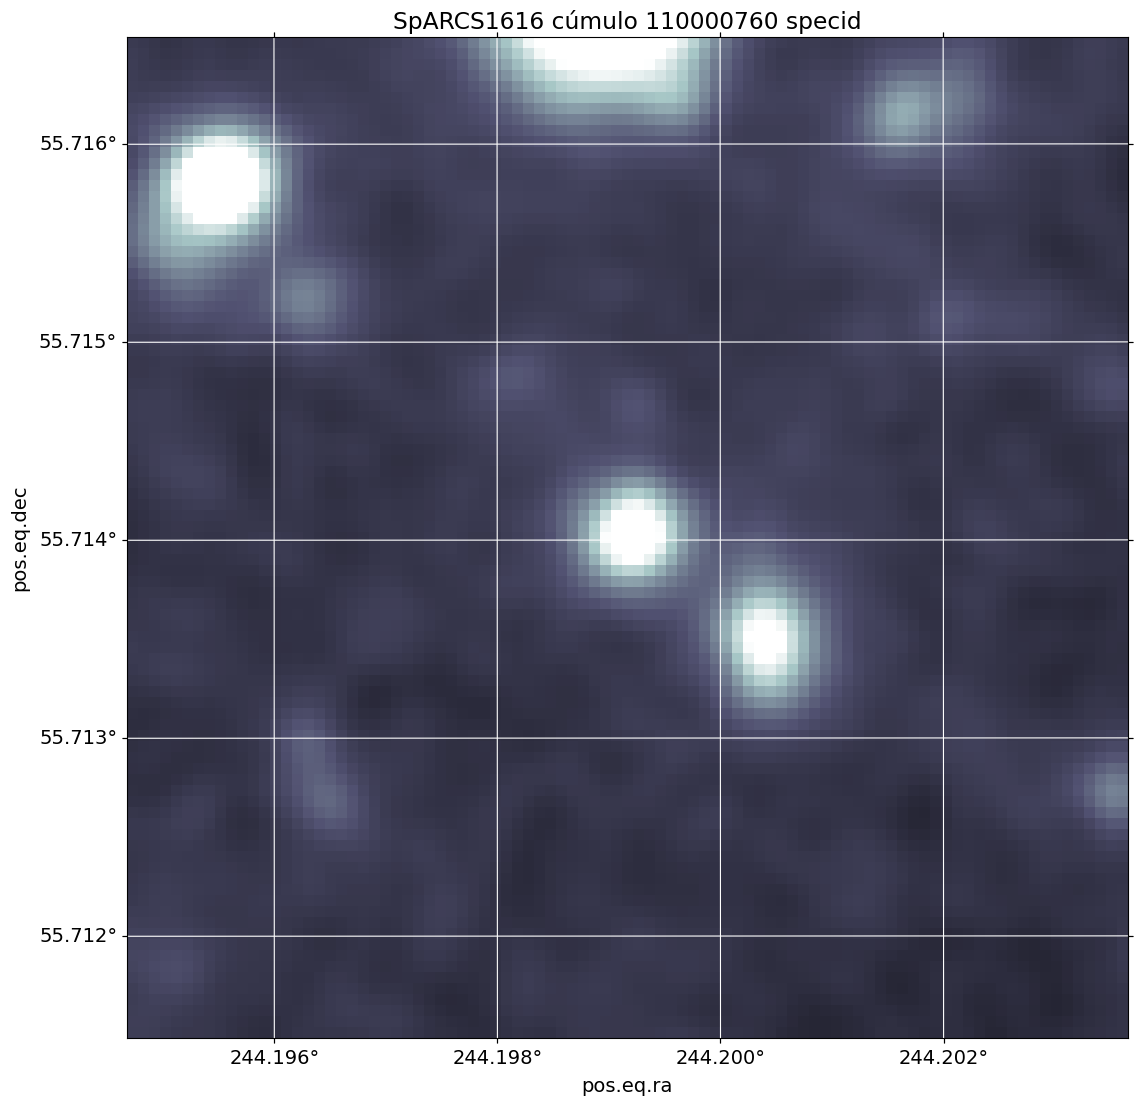

In [11]:
user_pick_index = 29
callSIA(ra, dec, row, cluster_name, galaxy_specid, user_pick_index)

La galaxia central en la imagen es la galaxia seleccionada, y las galaxias cercanas y lejanas también se ven en este recorte.

<A class = "Anchor" id = "Spec6"> </a>
# Espectros 1D y 2D completos de galaxia preseleccionada
La longitud de onda, el flujo y la varianza del flujo se consultan desde la base de datos utilizando la redshift_table. En esta sección, el espectro 1D y 2D se grafican por encima y por debajo del otro para comparar las similitudes y diferencias en las expresiones de la línea de emisión. Parte de la funcionalidad es similar al notebook [OGREENDr2AccesoADatosEnDataLab.ipynb](https://github.com/astro-datalab/notebooks-latest-es/blob/master/03_EjemplosDeCiencia/GOGREEN_GalaxiasEnEntornosEnriquecidos/1_GOGREENDr2AccesoADatosEnDataLab.ipynb).

In [12]:
def get_wavelength_from_hdu(hdr):
    """
    Lee 'CRVAL1' 'Naxis1' y 'CD1_1' para calcular la cobertura de la longitud de onda.

    Parámetros
    ----------
    HDR: objeto HDU
    Se adapta a la tabla de archivos usando bytesio

    Devolución
    -------
    Ninguno
    """
    return np.arange(hdr['CRVAL1'], hdr['CRVAL1']+hdr['NAXIS1']*hdr['CD1_1'], hdr['CD1_1'])

def get_spectrum(hdu, extver, units='fl', return_frame='observed', redshift=0.):
    """
    Acceso al espectro desde el archivo ajustado, convierta a unidades especificadas en el marco de descanso.

    Nota: El espectro de entrada debe estar en unidades ERG CM^-2 S^-1 A^-1
    Nota: Los valores de encabezado deben dar una longitud de onda en Angstroms

    Parámetros
    ----------
    hdr: objeto HDU
    Se adapta a la tabla de archivos usando bytesio
    
    extver: Pandas DataFrame
    Columna RedShift_Table ['Extver'] con índice Galaxy
    
    units: cadena
    Unidades de espectro de salida, casos insensibles
    
    return_frame: cadena
    Qué marco devolver las unidades de longitud de onda. Si 'descansar', se requiere un desplazamiento al rojo.
    
    redshift: flotante
    Desplazamiento al rojo de la galaxia para convertir en marco de descanso, si rojo-shift = 0 devuelve el marco observado

    Devolución
    -------
    lam: matriz numpy de flotante
    Longitud de onda en angstroms
    
    spec: matriz numpy de flotante
    Flujo en erg cm^-2 s^-1 a^-1
    
    var: matriz numpy de flotante
    Varianza de flujo en erg cm^-2 s^-1 a^-1
    """
    extver = int(extver)

    units = units.lower()
    assert units in ['fl','maggies','fnu'], 'Error, "units" deben ser "Fl" o "maggies"'
    return_frame = return_frame.lower()
    assert return_frame in ['rest','observed'], 'Error, "return_frame" debe ser "rest" o "observed"'

    scale = hdu['SCI',extver].header['FLUXSCAL']
    spec = hdu['SCI',extver].data / scale
    var = hdu['VAR',extver].data / scale**2
    lam = get_wavelength_from_hdu(hdu['SCI',extver].header)

    if return_frame == 'rest': # convertir de la longitud de onda observada en reposo
        assert redshift >= 0, 'ERROR: redshift must be positive, is {}'.format(redshift)

        dl = (cosmo.luminosity_distance(redshift).to(u.pc).value / 10.)**(-2)
        spec *= (1. + redshift) / dl
        var *= ((1. + redshift) / dl)**2
        lam /= (1. + redshift)
        
    if units == "maggies":
        convers = (3.34e4 * lam**2)/3631.
        spec *= convers
        var *= convers**2
    elif units == "fnu":
        convers = (3.34e4 * lam**2)
        spec *= convers
        var *= convers**2
        
    return (lam, spec, var)

In [13]:
def display_1D(redshift_table, cluster_name, galaxy_specid):
    """
    Devuelve la longitud de onda vs flujo de una galaxia para el espectro 1D.

    Parámetros
    ----------
    redshift_table: Pandas DataFrame
    Tabla de datos para todas las galaxias
    
    cluster_name: cadena
    Nombre del cúmulo seleccionado
    
    galaxy_specid: int
    Número para identificar galaxia específica

    Devolución
    -------
    obj: Pandas DataFrame
    Tabla de datos extraída de RedShift_Table de Galaxy seleccionada
    
    obj_index: int
    Índice de la galaxia seleccionada en Redshift_Table
    
    lam: matriz numpy de flotante
    Longitud de onda en angstroms
    
    spec: matriz numpy de flotante
    Flujo en erg cm^-2 s^-1 a^-1
    
    var: matriz numpy de flotante
    Varianza de flujo en erg cm^-2 s^-1 a^-1
    
    max_index: int
    Índice donde el máximo de la línea de emisión [o ii] está
    
    max_spec: flotante
    Flujo de la línea de emisión [O II] en su máximo
    """
    # Realice solo el marco de datos PANDAS solo para la galaxia seleccionada
    obj = redshift_table.query('(cluster=="{}") & (specid == {})'.format('%s'%cluster_name, galaxy_specid))
    obj_index = obj.index.values[0]
    fits_path = oneddir + '%s_final.fits'%cluster_name
    
    # Devuelva la longitud de onda, el flujo y la varianza del flujo de la galaxia seleccionada
    with fits.open(BytesIO(sc.get(fits_path))) as hdu:
        lam, spec, var = get_spectrum(hdu, redshift_table.loc[obj_index,'extver'], return_frame='observed') # Obtener espectros de cuadro observados
        
    # Gráfico de espectro 1D del rango de longitud de onda completa
    fig, ax = plt.subplots(1,1, figsize=(18,4))
    ax.step(lam, spec, color='k', where='mid', lw=0.5)
    ax.fill_between(lam, spec+np.sqrt(var), spec-np.sqrt(var), alpha=1, color='limegreen', step='mid')
    ax.set(title='Espectro 1D de Galaxia %i en %s' %(galaxy_specid,cluster_name),xlabel='Longitud de onda observada $(\AA)$', ylabel='Flujo $(~ergs~s^{-1}~cm^{-2}~\AA^{-1}$)', yscale='linear', 
           xlim=[0.99*np.min(lam), np.max(lam)/0.99])
    ax.set_ylim(-1e-18,8e-18)
    ax.set_xlim(np.nanmin(lam),np.nanmax(lam))

    max_spec = 0.
    for i in range(len(lam)): # Encuentre el índice y el valor del máximo [O II]
        if lam[i]>7000 and lam[i]<7500:
            if max_spec<spec[i]:
                max_spec = spec[i]
                max_index = i

    ax.scatter(lam[max_index],max_spec,s=50,c='red',marker=(5, 1))
    plt.show() 
    
    return (obj, obj_index, lam, spec, var, max_index, max_spec)

In [14]:
def display_2D(cluster_name, redshift_table, obj_index):
    """
    Devuelve la longitud de onda y el píxel de una galaxia para el espectro 2D

    Parámetros
    ----------
    redshift_table: Pandas DataFrame
    Tabla de datos para todas las galaxias
    
    cluster_name: cadena
    Nombre del cúmulo seleccionado
    
    obj_index: int
    Índice de la galaxia seleccionada en Redshift_Table

    Devolución
    -------
    Ninguno
    """
    onedfile = oneddir + cluster_name + '_final.fits'
    cluster = redshift_table['cluster'][obj_index]
    ext = redshift_table['extver'][obj_index]
    specid = redshift_table['specid'][obj_index]
    with fits.open(BytesIO(sc.get(onedfile))) as onedspec:  # Lectura de archivo del servicio de archivo
        mdf = onedspec['mdf',1].data
        spectrum = onedspec['sci',ext].data
        header_primary = onedspec[0].header

        hd = onedspec['sci',ext].header
        unc = np.sqrt( var )
    
    # calcular matriz de longitud de onda
    pix = np.arange(1,hd['naxis1']+1)
    ll = hd['crval1']+(pix-hd['crpix1'])*hd['cd1_1']
    
    # hacer variables de los nombres de los archivos
    twodfile = twoddir + cluster + '_twod.fits.gz'
    zmaglim = np.array([23.5, 23.0])
    
    cols = ['specid','extver','redshift','redshift_quality','ra','dec','objclass','snr_8500_var']
    specid, ext, zspec, Quality, ra, dec, objclass, snr_target = redshift_table.loc[obj_index,cols].values.T

    fig,ax5 = plt.subplots(1,1, figsize=(18, 4))
    twodexists = True
    # Leer bits sin procesar del servicio de archivo a través de sc.get (),
    # luego en un objeto BytesIO (se comporta como un archivo en RAM),
    # luego descomprimir con gzip,
    # Y finalmente abrirlo con astropy.io.fits
    with fits.open(gzip.GzipFile(fileobj=BytesIO(sc.get(twodfile)))) as twodspec:

        try:
            twod = twodspec['sci',ext].data
        except:
            twodexists = False    

    if twodexists:
        maxval = 3*np.nanmax(np.abs(np.nanmedian(twod[2:8,950:1100],1)))
        if (maxval<= 0):
            maxval = 3*np.nanmax(np.abs(np.nanmedian(twod,1)))
        extent = [ll[0],ll[-1],1,20]
        ax5.imshow(twod[:,:], extent=extent, origin='lower', aspect=10, vmax=maxval, vmin=-maxval, cmap=plt.get_cmap('gray'))
        ax5.set_xlim(ll[0],ll[-1])
        plt.ticklabel_format(axis='y', style='sci', scilimits=(1,0)) # Establecer el eje Y con la notación científica para que coincida con la longitud del espectro 1D
        ax5.set_xlabel("Longitud de onda observada $(\AA)$")
        ax5.set_ylabel("Píxeles")
        plt.title('Espectro 2D de Galaxia %i en %s' %(galaxy_specid,cluster_name))
    fig.show()

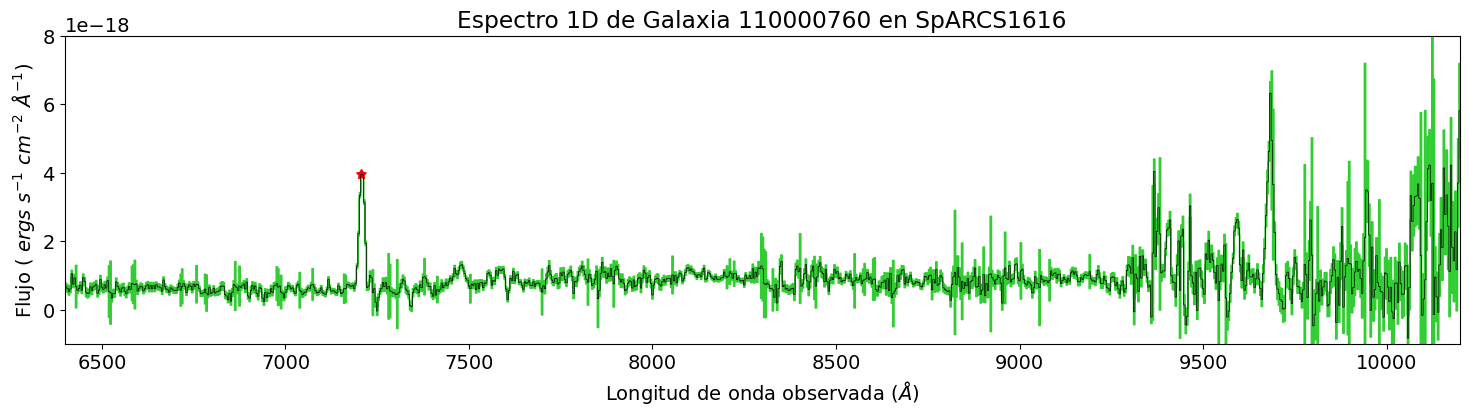

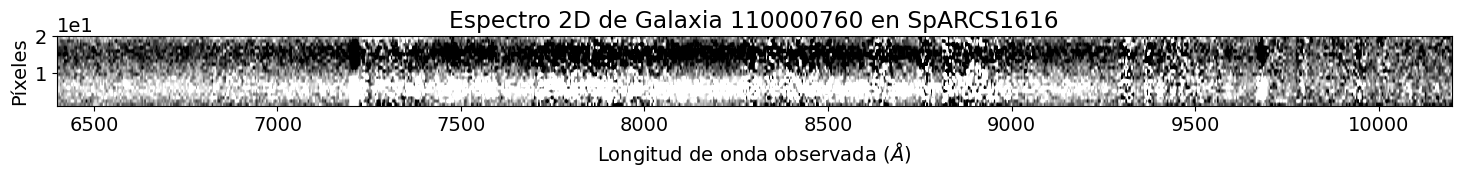

In [15]:
obj, obj_index, lam, spec, var, max_index, max_spec = display_1D(redshift_table, cluster_name, galaxy_specid)
display_2D(cluster_name, redshift_table, obj_index)

Tenga en cuenta que los máximos distintos en el espectro 1D (excluyendo el ruido) corresponden estrechamente a distintas firmas de banda en el espectro 2D, que indican que se detecta un elemento específico. Para encontrar el desplazamiento al rojo, [O II] es una de las líneas de interés de emisión indicadas por la estrella roja en el espectro 1D. En el ejemplo anterior, también podemos detectar el doblete \[O III] 4959,5007 alrededor de la longitud de onda observada 9600-9700 angstrom. Tenga en cuenta cómo hay un aumento del ruido del espectro alrededor de 9400 Angstroms y arriba.

<a class = "Anchor" id = "Spec7"> </a>
# Use la línea de emisión [O ii] y un ajuste Gaussiano del espectro con continuo substraído
Primero, amplíe un rango de 100 Angstrom centrado alrededor del tope del máximo de la línea de emisión [O II]. Luego, divida la ventana 100 Angstrom en tres regiones: [0, 25], [25,75], [75,100]. Usando estas tres regiones, encuentre el ajuste continuo al encontrar el valor medio del ajuste entre la region primera y la tercera.

In [16]:
xwindow_range = 50 # +/- distancia desde el máximo de la línea de emisión
ywindow_range = 1e-18 # no en uso ahora mismo

In [17]:
def continuum_fit(lam, spec, var, max_index): 
    """
    Devuelve el ycontinuum y los índices de la línea de emisión [O II].

    Parámetros
    ----------
    lam: matriz numpy de flotante
    Longitud de onda en angstroms
    
    spec: matriz numpy de flotante
    Flujo en erg cm^-2 s^-1 A^-1
    
    var: matriz numpy de flotante
    Varianza de flujo en erg cm^-2 s^-1 A^-1
    
    max_index: int
    Índice donde el máximo de la línea de emisión [o ii] está

    Devolución
    -------
    ycontinuum: matriz numpy de flotante
    Ajuste lineal en +/- 25 Regiones finales de Angstrom de la ventana de la línea de emisión [O II]
    
    límites_index: matriz numpy de int
    Índices para regiones que limitan la línea de emisión [O II] en 25 intervalos de Angstrom
    """
    # Encuentra los índices de la gama de ventanas
    range_bounds = np.array([-xwindow_range,-25,25,xwindow_range])
    bounds_index = np.array([])
    for i in range(len(range_bounds)):
        idx = (np.abs(lam - (int(lam[max_index]) + int('%i'%range_bounds[i])) )).argmin()
        bounds_index = np.append(bounds_index,idx)
    bounds_index = bounds_index.astype(int)
    
    # Establezca la longitud de onda de los índices
    region1_x = lam[bounds_index[0]:bounds_index[1]+1]
    region2_x = lam[bounds_index[2]:bounds_index[3]+1]
    region1_y = spec[bounds_index[0]:bounds_index[1]+1]
    region2_y = spec[bounds_index[2]:bounds_index[3]+1]
    print(region1_x.shape,region2_x.shape)
    
    # Ajuste las dos regiones con un ajuste lineal
    poly_region1 = (np.polyfit(region1_x, region1_y, deg=1)) # pendiente de ajuste lineal [0] e intersección y [1] para la región 1
    poly_region2 = (np.polyfit(region2_x, region2_y, deg=1)) # pendiente de ajuste lineal [0] e intersección y [1] para la región 2
    
    # Tome el valor medio de los dos ajustes lineales
    poly_median = np.median( [np.polyval(poly_region1,region1_x),np.polyval(poly_region2,region2_x)]) # Valor Y mediano de las Regiones 1 y 2 Fit
    ycontinuum = np.zeros(lam.size)
    ycontinuum[bounds_index[0]:bounds_index[3]+1] = poly_median
    
    return (ycontinuum, bounds_index)

In [18]:
def plot_emission_line(lam, spec, var, max_index, ycontinuum=np.array([]), g_fit=None):
    """
    Grafica una línea de emisión con un rango de ventana de 100 angstroms

    Parámetros
    ----------
    lam: matriz numpy de flotante
    Longitud de onda en angstroms
    
    spec: matriz numpy de flotante
    Flujo en erg cm^-2 s^-1 a^-1
    
    var: matriz numpy de flotante
    Varianza de flujo en erg cm^-2 s^-1 a^-1
    
    max_index: int
    Índice donde el máximo de la línea de emisión [o ii] está

    ycontinuum: matriz numpy de flotante
    Ajuste lineal en +/- 25 Regiones finales de Angstrom de la ventana de la línea de emisión [O II]
    
    g_fit: class Models.Gaussian1d
    Clase que contiene los parámetros de distribución gaussiana desde el ajuste, incluyendo amplitud, media y std.
    
    Devolución
    -------
    Ninguno
    """
    fig, ax = plt.subplots(1,1, figsize=(16,4))
    ax.step(lam, spec, color='k', where='mid', lw=0.5)
    ax.fill_between(lam, spec+np.sqrt(var), spec-np.sqrt(var), alpha=1, color='orange', step='mid')
    ax.set(title='Zoom en espectro 1D alrededor de [O II]', xlabel='Longitud de onda observada $(\AA)$', ylabel='Flujo $(~ergs~s^{-1}~cm^{-2}~\AA^{-1}$)', yscale='linear', 
           xlim=[0.99*np.min(lam), np.max(lam)/0.99])
    ax.set_ylim(-1e-18,max_spec+1e-18)
    ax.set_xlim(int(lam[max_index])-xwindow_range,int(lam[max_index])+xwindow_range)
    ax.scatter(lam[max_index],spec[max_index],s=50,c='red',marker=(5, 1))
    if len(ycontinuum) != 0:
        ax.plot(lam,ycontinuum,color='b')
    elif g_fit!=None:
        x = np.linspace(int(lam[max_index])-xwindow_range,int(lam[max_index])+xwindow_range)
        y_fit = g_fit(x*u.AA)
        # Imprima los resultados después de que se realice el ajuste
        print("g_fit (resultados de ajuste):", g_fit)
        ax.plot(x,y_fit,c='blue')
        plt.show()

(8,) (8,)


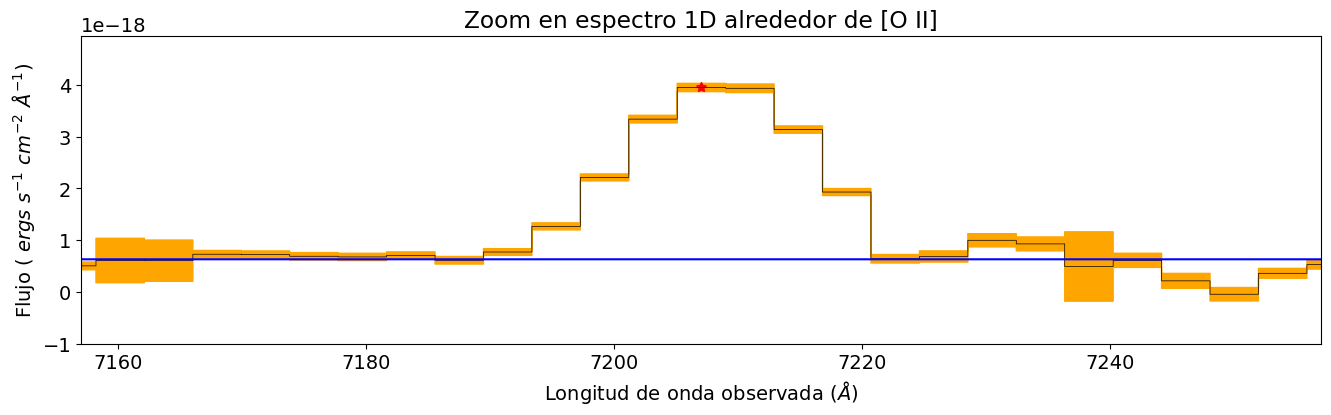

In [19]:
ycontinuum, bounds_index = continuum_fit(lam, spec, var, max_index)
plot_emission_line(lam,spec,var,max_index, ycontinuum=ycontinuum)

Una distribución gaussiana se conoce comúnmente como una distribución normal y tiene una curva de campana simétrica caracterizada por Sigma (σ), el porcentaje de datos bajo la curva en una desviación estándar arbitraria lejos de la media. Por lo tanto, el espectro debe transformarse alrededor de [O II] para acercarse aproximadamente a cero a medida que el espectro va más lejos del máximo de la línea de emisión. Después de encontrar el Continuum_Fit como una constante, podemos restar todo el espectro por esta constante para obtener el espectro continuo restado.

In [20]:
def subtract_spectrum(spec, max_spec, ycontinuum, max_index): 
    """
    Devuelve el continuo restado Spetrum y el nuevo máximo de la línea de emisión [O II].

    Parámetros
    ----------
    spec: matriz numpy de flotante
    Flujo en erg cm^-2 s^-1 A^-1
    
    max_spec: flotante
    Máximo de flujo de la línea de emisión [O II]
    
    ycontinuum: matriz numpy de flotante
    Ajuste lineal en +/- 25 Regiones finales de Angstrom de la ventana de la línea de emisión [O II]
    
    max_index: int
    Índice donde el máximo de la línea de emisión [O ii] está

    Devolución
    -------
    continuum_subtracted_spectrum: matriz numpy de flotación
    Longitud de onda de la línea de emisión [O II] después de restar el ajuste de ycontinuum
    
    newmax_spec: flotante
    Nuevo máximo de flujo de la línea de emisión [O II]
    """
    # Resta el continuo y grafica el nuevo espectro
    continuum_subtracted_spectrum = spec - ycontinuum
    newmax_spec = max_spec - ycontinuum[max_index]
    
    return (continuum_subtracted_spectrum, newmax_spec)

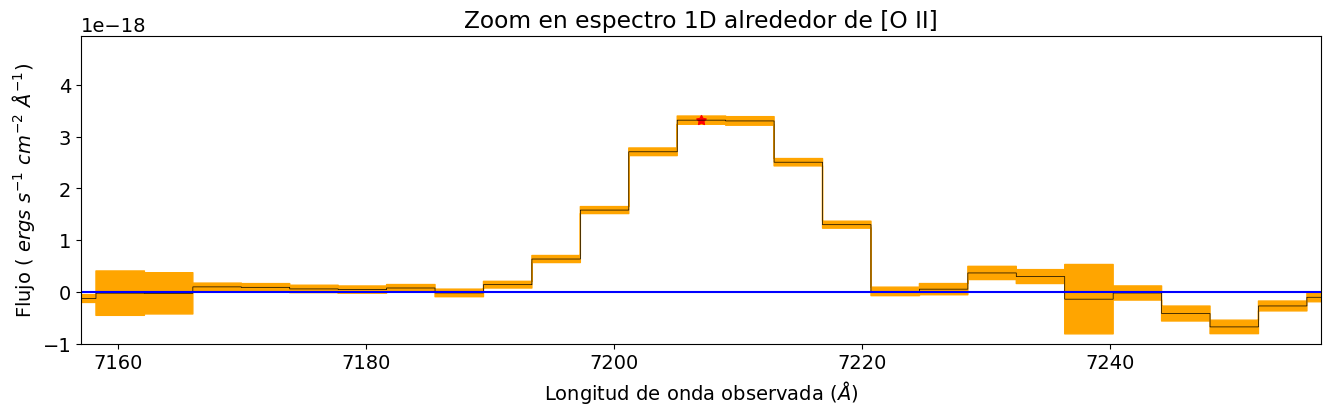

In [21]:
continuum_subtracted_spectrum, newmax_spec = subtract_spectrum(spec, max_spec, ycontinuum, max_index)
plot_emission_line(lam,continuum_subtracted_spectrum,var,max_index, ycontinuum=np.zeros(len(continuum_subtracted_spectrum)))

El continuo restó el espectro alrededor de la línea de emisión [O II] se convierte aproximadamente en cero en la dirección positiva y negativa desde la ventana graficada. Ahora, se ajusta a una distribución gaussiana de [O II].

In [22]:
def emission_gaussian(lam, continuum_subtracted_spectrum, bounds_index, var, max_index):
    """
    Devuelve el ajuste gaussiano de la línea de emisión de Spetrum [O II] con continuo.

    Parámetros
    ----------
    lam: matriz numpy de flotante
    Longitud de onda en angstroms
    
    continuum_subtracted_spectrum: matriz numpy de flotación
    Longitud de onda de la línea de emisión [O II] después de restar el ajuste de ycontinuum
    
    bounds_index: matriz numpy de int
    Índices para regiones que limitan la línea de emisión [O II] en 25 intervalos de Angstrom
    
    var: matriz numpy de flotante
    Varianza de flujo en erg cm^-2 s^-1 A^-1
    
    max_index: int
    Índice donde el máximo de la línea de emisión [O II] está

    Devolución
    -------
    g_fit: class Models.Gaussian1d
    Parámetros de ajuste gaussiano de la línea de emisión [O II] que incluye amplitud, media y ETS
    """
    # Estas unidades son de referencia
    flux_units = u.erg/u.s/(u.cm**2)/u.AA
    spec_units = u.erg/u.s/(u.cm**2)

    # Encuentra y grafica un ajuste gaussiano
    sub_region = SpectralRegion((int(lam[max_index])-xwindow_range)*u.AA,(int(lam[max_index])+xwindow_range)*u.AA)
    print(sub_region)
    # Use la longitud de onda y el flujo para crear un objeto Spectrum1D
    spectrum = Spectrum1D(spectral_axis=lam*u.AA, flux=continuum_subtracted_spectrum*flux_units)
    sub_spectrum = extract_region(spectrum, sub_region)
    
    # Inicializar el modelo gaussiano con estimaciones de amplitud, media, stddev
    g_init = models.Gaussian1D(newmax_spec, lam[max_index], 5.)
    g_fit = fit_lines(spectrum, g_init)
    # Imprimir valores de suposición inicial
    print("g_init (Conjeturas Iniciales):", g_init)

    return g_fit

Spectral Region, 1 sub-regions:
  (7157.0 Angstrom, 7257.0 Angstrom) 

g_init (Conjeturas Iniciales): Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
          amplitude             mean      stddev
    --------------------- --------------- ------
    3.318792716549051e-18 7207.0334379673    5.0
g_fit (resultados de ajuste): Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
          amplitude              mean             stddev     
    erg / (Angstrom s cm2)     Angstrom          Angstrom    
    ---------------------- ---------------- -----------------
     3.535571123962053e-18 7208.42112356152 7.034589845909856


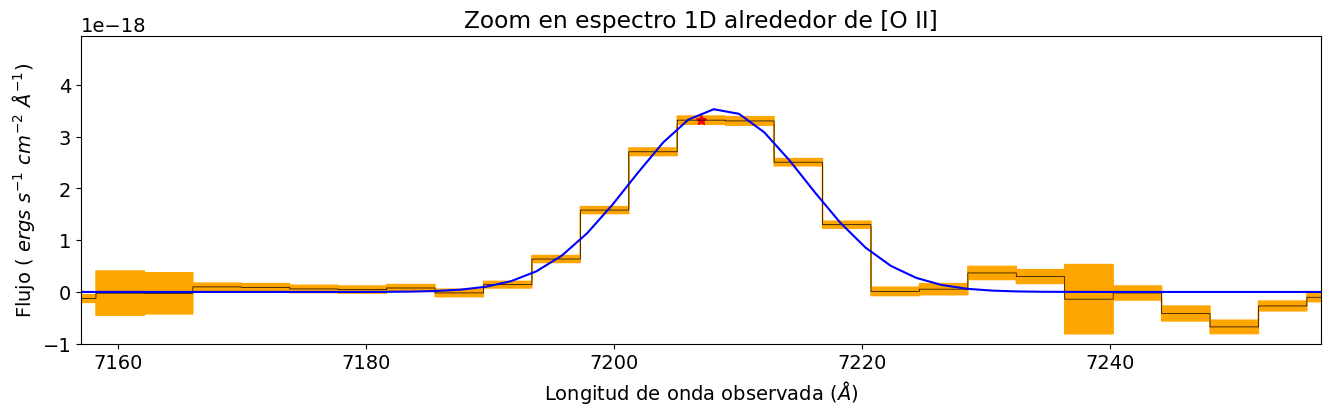

In [23]:
g_fit = emission_gaussian(lam, continuum_subtracted_spectrum, bounds_index, var, max_index)
plot_emission_line(lam, continuum_subtracted_spectrum, var, max_index, g_fit=g_fit)

El ajuste gaussiano para la línea de emisión [O II] tiene tres parámetros importantes: amplitud, media y desviación estándar. Use estos valores para encontrar un desplazamiento al rojo estimado y un ancho equivalente [o II], y compare las estimaciones con los números extraídos del conjunto de datos.

<A class = "Anchor" id = "Spec8"> </a>
# Comparar calculado con los valores de desplazamiento rojo y EW de Gogreen

In [24]:
def gaussian_equation(amplitude, mean, std):
    """
    Devuelve la función de densidad de probabilidad de una distribución gaussiana

    Parámetros
    ----------
    amplitude: flotante
    Flujo máximo de la distribución gaussiana
    
    mean: flotante
    Longitud de onda donde está el flujo máximo de la distribución gaussiana
    
    std: flotante
    Qué tan amplia es la distribución gaussiana

    Devolución
    -------
    lambda x: flotante
    Función de densidad de probabilidad de la distribución gaussiana a una longitud de onda específica (x)
    """
    return lambda x: amplitude*(np.exp(-1/2*((x-mean)/std)**2))

def calculate_values(g_fit, lam, max_index, obj, clusters_table, cluster_name, galaxy_specid):
    """
    Devuelve el desplazamiento al rojo estimado y el ancho equivalente de la línea de emisión [O II] y las compara con el conjunto de datos.

    Parámetros
    ----------
    g_fit: class Models.Gaussian1d
    Parámetros de ajuste gaussiano de la línea de emisión [O II] que incluye amplitud, media y ETS
    
    lam: matriz numpy de flotante
    Longitud de onda en angstroms
    
    max_index: int
    Índice donde el máximo de la línea de emisión [o ii] está

    obj: Pandas DataFrame
    Tabla de datos extraída de RedShift_Table de Galaxy seleccionada
    
    clusters_table: pandas dataFrame
    Tabla de datos para todos los cúmuloes
    
    cluster_name: cadena
    Nombre del cúmulo seleccionado
    
    galaxy_specid: int
    Número para identificar galaxia específica
    
    Devolución
    -------
    Ninguno
    """
    obs_wave = g_fit.mean.value # *U.AA
    std = g_fit.stddev.value # *U.AA
    amplitude = g_fit.amplitude.value # *Flux_units
    rest_wave = 3727 # *U.AA #Value de Google para O II
    redshift_z = (obs_wave/rest_wave)-1 # sin unidad
    
    line_flux = integrate.quad(gaussian_equation(amplitude,obs_wave,std),(int(lam[max_index])-xwindow_range),(int(lam[max_index])+xwindow_range)) # *Spec_Units
    
    integral_gauss = amplitude*std*np.sqrt(2*np.pi) # Otra forma de encontrar la integral de Gaussian
    
    # Para encontrar el EW de [O II], la fórmula es el área de flujo / máx,
    # donde el (1 + desplazamiento al rojo) es cambiar al marco observado
    line_ew = line_flux[0]/ycontinuum[max_index]/(1+redshift_z)
    line_ew2 = integral_gauss/ycontinuum[max_index]/(1+redshift_z)
    
    display_html(obj)
    
    redshift_difference = clusters_table.redshift[index_num]-obj.redshift[np.nanmin(obj.index)] # diferencia entre galaxia y cúmulo
    light_speed= 3e5 # km/s
    velocity_difference = (redshift_difference) * light_speed # km/s
    
    percent_err_redshift = ((redshift_z - obj.redshift[np.nanmin(obj.index)]) / obj.redshift[np.nanmin(obj.index)]) * 100
    percent_err_ew = ((line_ew - obj.ewoii[np.nanmin(obj.index)]) / obj.ewoii[np.nanmin(obj.index)]) * 100
    percent_err_ew_model = ((line_ew - obj.ewoii_model[np.nanmin(obj.index)]) / obj.ewoii_model[np.nanmin(obj.index)]) * 100

    print("Valor de flujo y valor_error =",line_flux)
    print("Corrimiento al rojo calculado = %f, EW por integrate.quad () = %f, ew por amplitud*std*np.sqrt (2*np.pi) = %f" %(redshift_z,line_ew,line_ew2))
    print("\ Diferencia entre el desplazamiento rojo calculado y gogreen = De %f, porcentaje de error = %.2f" %(abs(redshift_z - obj.redshift[np.nanmin(obj.index)]),percent_err_redshift) + '%')
    print("Diferencia entre EW calculado y Gogreen = %F, porcentaje de error = %.2f" %(abs(line_ew-obj.ewoii[np.nanmin(obj.index)]),percent_err_ew) + '%.')
    print("Diferencia entre el modelo EW calculado y gogreen = De %f, porcentaje de error = %.2f" %(abs(line_ew-obj.ewoii_model[np.nanmin(obj.index)]),percent_err_ew_model) + '%')
    print("\nLa diferencia entre el corrimiento al rojo de la galaxia y el corrimiento al rojo del cúmulo es %f\n\
lo que corresponde a una diferencia de velocidad de %.2f km/s.\n\
Como referencia, el umbral típico para la membresía de un cúmulo es una diferencia de velocidad menor a 1 500 km/s.\n\
Basado en esto, la galaxia con spec id %i probablemente no es miembro del cúmulo %s.\n\
Revisando la *redshift_table*, la bandera de membresía es %i." %(redshift_difference, velocity_difference, \
                                                           galaxy_specid,cluster_name,obj.member[np.nanmin(obj.index)]))

In [25]:
calculate_values(g_fit, lam, max_index, obj, clusters_table, cluster_name, galaxy_specid)

,elat,elon,glat,glon,htm9,nest4096,ring256,specid,ra,dec,d4000,delta_bic,ed4000,eewhdelta,eewoii,eewoii_model,ef_oii,esfr_oii,ewhdelta,ewoii,ewoii_model,f_oii,member,member_clean,member_em,random_id,redshift,sfr_oii,snr_8500_rms,snr_8500_var,spec_flag,extver,objclass,redshift_quality,cluster
12,73.698249,209.134348,43.625746,85.509677,3515739,41608456,67843,110000760,244.19926,55.714027,1.164522,6381.294,0.041577,2.193029,11.399464,1.101667,9.058426e-19,0.03426,5.35934,61.299263,50.33022,6.246353e-17,0,0,0,19.432947,0.93372,2.362466,4.035182,7.455099,0,1,1,4,SpARCS1616


Valor de flujo y valor_error = (6.234308557875552e-17, 1.7476529618610082e-22)
Corrimiento al rojo calculado = 0.934108, EW por integrate.quad () = 51.091709, ew por amplitud*std*np.sqrt (2*np.pi) = 51.091709
\ Diferencia entre el desplazamiento rojo calculado y gogreen = De 0.000388, porcentaje de error = 0.04%
Diferencia entre EW calculado y Gogreen = 10.207554, porcentaje de error = -16.65%.
Diferencia entre el modelo EW calculado y gogreen = De 0.761489, porcentaje de error = 1.51%

La diferencia entre el corrimiento al rojo de la galaxia y el corrimiento al rojo del cúmulo es 0.222280
lo que corresponde a una diferencia de velocidad de 66684.00 km/s.
Como referencia, el umbral típico para la membresía de un cúmulo es una diferencia de velocidad menor a 1 500 km/s.
Basado en esto, la galaxia con spec id 110000760 probablemente no es miembro del cúmulo SpARCS1616.
Revisando la *redshift_table*, la bandera de membresía es 0.


### Nota:
Si el ancho equivalente [o II](EWOII) es 0 y da como resultado un error porcentual de infinito, esto significa que hay un error de la base de datos (problema conocido para Gogreen DR1, que se ha solucionado para Gogreen DR2). Por lo tanto, si usa la versión DR1, use el EWOII_Model para comparar el ancho equivalente estimado con el número en la base de datos.

En general, para recapitular, las tablas de conjunto de datos de cúmulo y galaxia se leyeron de Gogreen DR2. Luego, utilizamos el servicio SIA para buscar las URL de imagen procesadas de nuestra galaxia preseleccionada en un cúmulo. La condición para la galaxia seleccionada es que hay un archivo .fits en los directorios de espectro 1D y 2D. Después de graficar la imagen de la galaxia, abrimos el archivo .fits usando BytesIO para recuperar y convertir la longitud de onda, el flujo y la varianza del flujo en las unidades apropiadas. Los espectros 1D y 2D muestran líneas de emisión útiles para extraer el desplazamiento al rojo de la galaxia, los anchos equivalentes de línea de emisión, el tipo de galaxia y otra información. La línea de emisión [O II] se estimó en alrededor de 7000 a 7500 angstroms, por lo que ampliamos en una ventana de 100 Angstrom alrededor del máximo de la línea de emisión más alto en esa área. Finalmente, calculamos un espectro continuo restado, y un ajuste Gaussiano1D a la línea de emisión [O II] determinó la amplitud, la media y la desviación estándar de la distribución. Estos tres números se utilizan para determinar el desplazamiento al rojo de la Galaxia y el ancho equivalente [o II], que está bastante cerca de la base de datos de Gogreen con una diferencia por debajo del cinco por ciento.

<A class = "Anchor" id = "Spec9"> </a>
# Referencias

Notebook [Listando archivos del conjunto de datos Gogreen DR2](https://github.com/astro-datalab/notebooks-latest-es/blob/master/03_EjemplosDeCiencia/GOGREEN_GalaxiasEnEntornosEnriquecidos/0_GOGREENDr1ServicioDeArchivos.ipynb)

Notebook [Gogreen Data Release 2 Acceso de datos en Astro Data Lab](https://github.com/astro-datalab/notebooks-latest-es/blob/master/3_EjemplosDeCiencia/GOGREEN_GalaxiasEnEntornosEnriquecidos/1_GOGREENDr2AccesoADatosEnDataLab.ipynb)

Notebook [Gogreen DR2 en Data Lab-Simple Image Access (SIA)](https://github.com/astro-datalab/notebooks-latest-es/blob/master/03_EjemplosDeCiencia/GOGREEN_GalaxiasEnEntornosEnriquecidos/2_GOGREENDr2SIA.ipynb)

[Balogh et al. (2021)](https://ui.adsabs.harvard.edu/abs/2021mnras.500..358b/abstract)  "The GOGREEN and GCLASS surveys: first data release." MNRAS 500, 358